In [2]:
# let's set up our environment
import numpy as np
import scipy as sp

%matplotlib inline
import matplotlib.pyplot as plt

(9, 1) (9, 1)
0.0 means they are exactly the same...


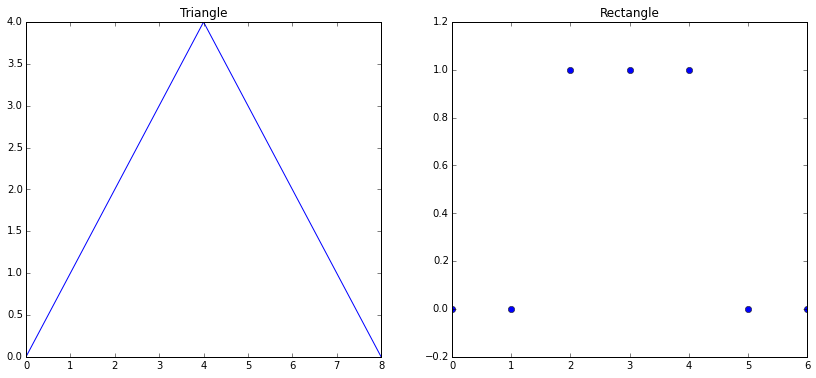

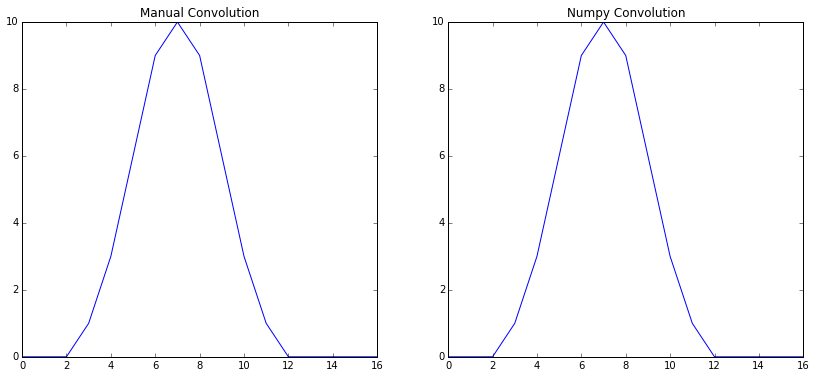

In [3]:
# let's do a simple example
triangle = np.array([[0, 1, 2, 3, 4, 3, 2, 1, 0]]).T # make as an ndarray column vector
rect = np.array([[0,0,1,1,1,0,0,0,0]]).T # make as an ndarray column vector

# confirm dimensions of shapes
print triangle.shape, rect.shape

# and let's plot them
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.title('Triangle')
plt.plot(triangle)
plt.subplot(122)
plt.title('Rectangle')
plt.plot(rect,'o')
plt.axis([0, 6, -0.2, 1.2])

# we will shift the rectangle across the triangle so we need to zero pad the
# triangle by the length of the rectangle minus 1 on both ends
paddedTri = np.concatenate((np.zeros((len(rect)-1,1),dtype=float),triangle,np.zeros((len(rect)-1,1),dtype=float)))

# let's allocate an array of the length of the convolution
rectConvTri = np.zeros(len(triangle)+len(rect)-1)

# create the flipped rectangle (as row vector) once
revRect = np.flipud(rect)
revRect = revRect.T

#print paddedTri.shape, np.dot(revRect,paddedTri[0:(len(rect))])
for i in range(len(rectConvTri)):
    rectConvTri[i] = np.dot(revRect,paddedTri[i:(i+len(rect))])

# use the numpy convolve function (takes one-dim arrays only thats why we use flatten)
rectConvTri2 = np.convolve(np.ndarray.flatten(triangle),np.ndarray.flatten(rect))

plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.title('Manual Convolution')
plt.plot(rectConvTri)

#figure(2)
plt.subplot(122)
plt.title('Numpy Convolution')
plt.plot(rectConvTri2)

# print the sum of the difference between the 2 convolutions
print np.sum(rectConvTri - rectConvTri2),'means they are exactly the same...'

Cello dimensions: (729001,)
Balloon pop dimensions: (459282, 2)
The cello file has 729001 samples and the balloon pop file has 459282 samples
Our convolution will have 1188282 samples


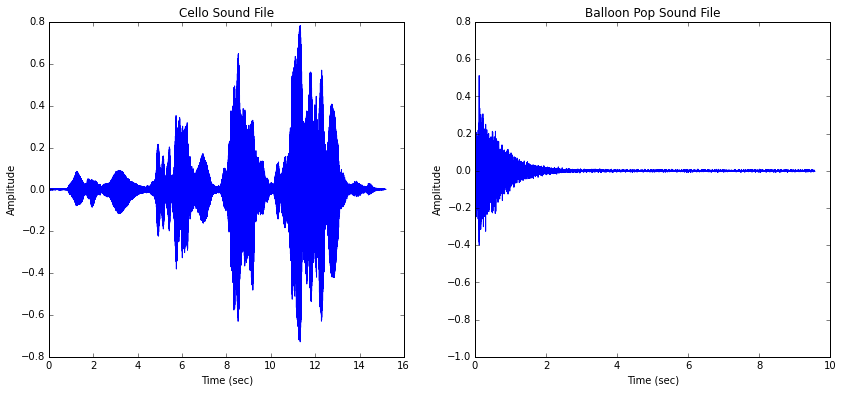

In [4]:
from scipy.io.wavfile import read # allows us to read in wave files

# read in the wave files
Cello = read("celloDryC.wav")
Balloon = read("BalloonPop.wav")
# get the sample rate
CelloSR = Cello[0]
BalloonSR = Balloon[0]

# verify the sample rates match, why does this matter?
if CelloSR != BalloonSR:
    print 'Error: Sample Rates don\'t match'

# calculuate the sample period
T = 1.0/CelloSR;
# extract the audio sample values
CelloValues = np.array(Cello[1],dtype=float)
print 'Cello dimensions:',CelloValues.shape
BalloonValues = np.array(Balloon[1],dtype=float)
print 'Balloon pop dimensions:',BalloonValues.shape
# only keep 1 channel of balloon values
BalloonValues = BalloonValues[:,1]

# plot the dry cello and balloon pop audio values
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.title('Cello Sound File')
plt.plot(np.float_(range(len(CelloValues)))*T,CelloValues)
plt.ylabel('Amplitude')
plt.xlabel('Time (sec)')
plt.subplot(122)
plt.title('Balloon Pop Sound File')
plt.plot(np.float_(range(len(BalloonValues)))*T,BalloonValues)
plt.ylabel('Amplitude')
plt.xlabel('Time (sec)')

# play the audio files before convolution (will do externally for convenience)

# what are our dimensions?
ConvLen = CelloValues.shape[0] + BalloonValues.shape[0] - 1
print 'The cello file has',CelloValues.shape[0],'samples and the balloon pop file has',BalloonValues.shape[0],'samples'
print 'Our convolution will have', ConvLen, 'samples'

Just to verify, the actual length of the convolution is: 1188282


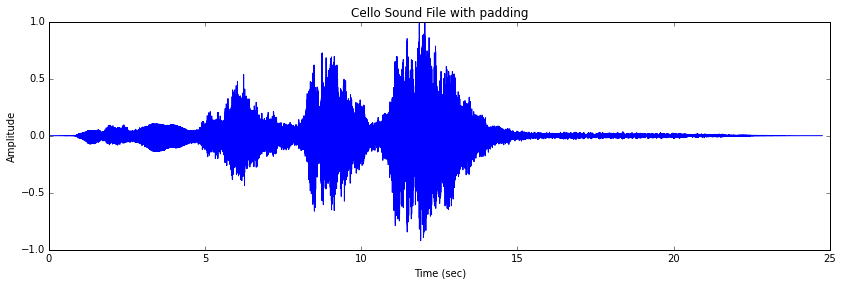

In [6]:
from scipy.io.wavfile import write # allows us to write out wave files

# we will perform an FFT convolution because np.convolve is too slow on "big" files
from scipy import signal # get access to fftconvolve function
convolvedSound = signal.fftconvolve(BalloonValues,CelloValues,mode='full')
print 'Just to verify, the actual length of the convolution is:',len(convolvedSound)

# we need to normalized back to audio range [-1,1]
convolvedSound = convolvedSound/np.amax(convolvedSound)

# plot the result
plt.figure(figsize=(14, 9))
plt.subplot(211)
plt.title('Cello Sound File with padding')
plt.plot(np.float_(range(len(convolvedSound)))*T,convolvedSound)
plt.ylabel('Amplitude')
plt.xlabel('Time (sec)')

# export the mono wave file result
write('WetCello.wav',CelloSR,convolvedSound)